# Pre-Processing
Working on a single day of data 12/01/2019

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/chicago-boundaries/Chicago_Boundaries/geo_export_f73c28e2-a0b8-4b1b-af59-0a22365969cb.shp
/kaggle/input/chicago-boundaries/Chicago_Boundaries/geo_export_f73c28e2-a0b8-4b1b-af59-0a22365969cb.dbf
/kaggle/input/chicago-boundaries/Chicago_Boundaries/geo_export_f73c28e2-a0b8-4b1b-af59-0a22365969cb.shx
/kaggle/input/chicago-single-day/chicago_december.csv


*Import libraries & data sources*

In [2]:
from shapely.geometry import Point
from shapely import wkt
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt 
from mpl_toolkits.axes_grid1 import make_axes_locatable


rides_data = pd.read_csv("../input/chicago-single-day/chicago_december.csv")
rides_data = rides_data.dropna()
chicago_map = gpd.read_file("../input/chicago-boundaries/Chicago_Boundaries/geo_export_f73c28e2-a0b8-4b1b-af59-0a22365969cb.shp")

In [3]:
rides_data.head()

,Trip ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,...,Additional Charges,Trip Total,Shared Trip Authorized,Trips Pooled,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
0,001893c6771b9c65daad5d3e78a6bb568eeb3c54,12/01/2019 12:00:00 AM,12/01/2019 12:15:00 AM,873,4.5,1.703184e+10,1.703132e+10,28.0,32.0,10.0,...,2.55,12.55,False,1,41.884768,-87.684147,POINT (-87.6841474493 41.8847677845),41.884987,-87.620993,POINT (-87.6209929134 41.8849871918)
3,002a9214f8bc76ba900845c95bf685638a1131d6,12/01/2019 12:00:00 AM,12/01/2019 12:15:00 AM,1046,3.0,1.703183e+10,1.703133e+10,28.0,33.0,10.0,...,2.55,12.55,False,1,41.885281,-87.657233,POINT (-87.6572331997 41.8852813201),41.859350,-87.617358,POINT (-87.6173580061 41.859349715)
7,00511d8a05b969ada7b07034469dd102d2321ac3,12/31/2019 12:00:00 AM,12/31/2019 12:00:00 AM,290,1.1,1.703183e+10,1.703122e+10,22.0,22.0,5.0,...,2.55,7.55,False,1,41.928619,-87.685362,POINT (-87.685362024 41.9286190509),41.915910,-87.683826,POINT (-87.6838259399 41.9159097884)
8,0054420f1e086f8dd7fe25e54569b4215aa27070,12/31/2019 12:00:00 AM,12/31/2019 12:15:00 AM,661,2.2,1.703183e+10,1.703106e+10,3.0,6.0,7.5,...,2.55,10.05,False,1,41.958056,-87.660389,POINT (-87.6603894557 41.958055933),41.943237,-87.643471,POINT (-87.6434709559 41.9432371225)
9,005a6ce433c191dcae955075f6a7f0e48d5a5a1e,12/01/2019 12:00:00 AM,12/01/2019 12:15:00 AM,668,2.3,1.703183e+10,1.703132e+10,28.0,32.0,7.5,...,2.55,10.05,False,1,41.885281,-87.657233,POINT (-87.6572331997 41.8852813201),41.870607,-87.622173,POINT (-87.6221729369 41.8706073724)


In [4]:
rides_data.shape

(4593, 21)

## Convert CRS (*Coordinate Reference Systems*) - a standard we'll use going forward 

### We plot one day data using the Point geometry

In [5]:
chicago_map = gpd.GeoDataFrame(chicago_map, crs='EPSG:4326', geometry='geometry')

rides_data["Pickup Centroid Location"] = rides_data["Pickup Centroid Location"].apply(wkt.loads)                                                                                                                                                                            
rides_data["Dropoff Centroid Location"] = rides_data["Dropoff Centroid Location"].apply(wkt.loads)

# # # Create GeoDataFrame with ride data 
pick_ups = gpd.GeoDataFrame(rides_data, crs='EPSG:4326', geometry='Pickup Centroid Location')
drop_offs = gpd.GeoDataFrame(rides_data, crs='EPSG:4326', geometry='Dropoff Centroid Location')

## Pickups

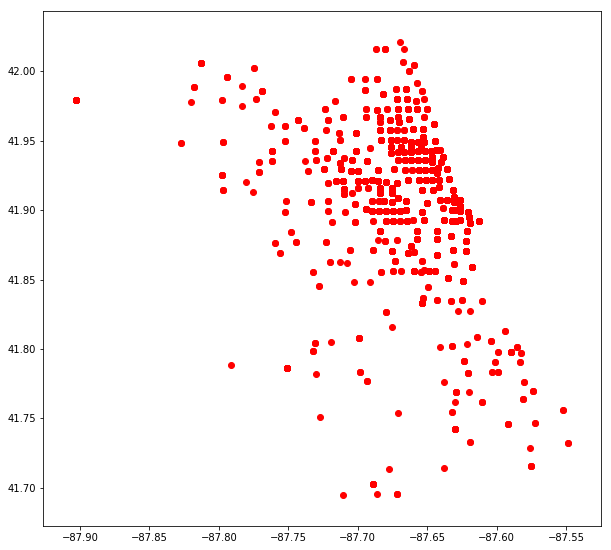

In [6]:
pick_ups.plot(figsize = (10,10), color='red')

## Dropoffs

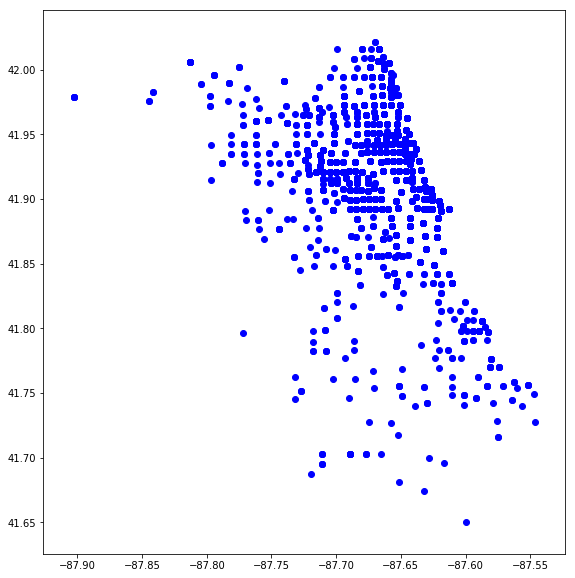

In [7]:
drop_offs.plot(figsize= (10,10), color='blue')

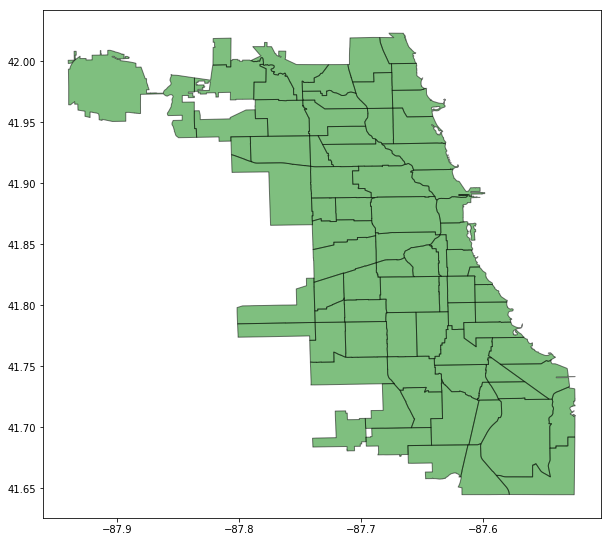

In [8]:
chicago_map.plot(figsize = (10,10), color='green', alpha=0.5, edgecolor='black')

# Spatial Join - Mapping Points inside of Polygons

### Spatial Joins allow us to:
* Combine any set of data based on geometry
* Examples: Weather Data, Traffic Data, Population Data, Other

In [9]:
chicago_map.head()

,area,area_num_1,area_numbe,comarea,comarea_id,community,perimeter,shape_area,shape_len,geometry
0,0.0,35,35,0.0,0.0,DOUGLAS,0.0,4.600462e+07,31027.054510,"POLYGON ((-87.60914 41.84469, -87.60915 41.844..."
1,0.0,36,36,0.0,0.0,OAKLAND,0.0,1.691396e+07,19565.506153,"POLYGON ((-87.59215 41.81693, -87.59231 41.816..."
2,0.0,37,37,0.0,0.0,FULLER PARK,0.0,1.991670e+07,25339.089750,"POLYGON ((-87.62880 41.80189, -87.62879 41.801..."
3,0.0,38,38,0.0,0.0,GRAND BOULEVARD,0.0,4.849250e+07,28196.837157,"POLYGON ((-87.60671 41.81681, -87.60670 41.816..."
4,0.0,39,39,0.0,0.0,KENWOOD,0.0,2.907174e+07,23325.167906,"POLYGON ((-87.59215 41.81693, -87.59215 41.816..."


In [10]:
chicago_map_with_drop_offs = gpd.sjoin(drop_offs, chicago_map, how='inner', op='within')
chicago_map_with_pick_ups = gpd.sjoin(pick_ups, chicago_map, how='inner', op='within')
chicago_map_with_drop_offs.head()

,Trip ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,...,index_right,area,area_num_1,area_numbe,comarea,comarea_id,community,perimeter,shape_area,shape_len
0,001893c6771b9c65daad5d3e78a6bb568eeb3c54,12/01/2019 12:00:00 AM,12/01/2019 12:15:00 AM,873,4.5,1.703184e+10,1.703132e+10,28.0,32.0,10.0,...,37,0.0,32,32,0.0,0.0,LOOP,0.0,4.633557e+07,39428.672996
9,005a6ce433c191dcae955075f6a7f0e48d5a5a1e,12/01/2019 12:00:00 AM,12/01/2019 12:15:00 AM,668,2.3,1.703183e+10,1.703132e+10,28.0,32.0,7.5,...,37,0.0,32,32,0.0,0.0,LOOP,0.0,4.633557e+07,39428.672996
28,0109eca6806aa158a745f04db473c202b627cf2e,12/01/2019 12:00:00 AM,12/01/2019 12:15:00 AM,815,4.1,1.703124e+10,1.703132e+10,24.0,32.0,10.0,...,37,0.0,32,32,0.0,0.0,LOOP,0.0,4.633557e+07,39428.672996
102,0455284dc849f0051802a00546d8ddec15111a50,12/01/2019 12:00:00 AM,12/01/2019 12:00:00 AM,179,0.5,1.703133e+10,1.703132e+10,33.0,32.0,2.5,...,37,0.0,32,32,0.0,0.0,LOOP,0.0,4.633557e+07,39428.672996
106,04836f81f62389cd6125b3d37ad83f23454524e1,12/31/2019 12:00:00 AM,12/31/2019 12:00:00 AM,91,0.2,1.703184e+10,1.703184e+10,32.0,32.0,2.5,...,37,0.0,32,32,0.0,0.0,LOOP,0.0,4.633557e+07,39428.672996


## Order data per community with most Drop offs 

In [11]:
chicago_map_with_drop_offs.community.value_counts().head(20)

NEAR NORTH SIDE    981
LAKE VIEW          588
WEST TOWN          438
LINCOLN PARK       372
LOOP               337
LOGAN SQUARE       292
NEAR WEST SIDE     287
UPTOWN             179
NEAR SOUTH SIDE    106
EDGEWATER           89
LINCOLN SQUARE      87
AVONDALE            86
NORTH CENTER        74
ROGERS PARK         67
LOWER WEST SIDE     65
IRVING PARK         49
ALBANY PARK         36
HYDE PARK           36
HUMBOLDT PARK       30
PORTAGE PARK        29
Name: community, dtype: int64

# Same thing for Pick ups

In [12]:
chicago_map_with_pick_ups.community.value_counts().head(20)

NEAR NORTH SIDE    999
NEAR WEST SIDE     550
LAKE VIEW          513
LINCOLN PARK       396
WEST TOWN          378
LOGAN SQUARE       334
LOOP               279
OHARE              185
UPTOWN             184
NEAR SOUTH SIDE     99
NORTH CENTER        63
LOWER WEST SIDE     58
GARFIELD RIDGE      54
AVONDALE            51
EDGEWATER           46
LINCOLN SQUARE      42
IRVING PARK         31
HUMBOLDT PARK       24
ARMOUR SQUARE       19
HYDE PARK           17
Name: community, dtype: int64

# Choropleths

In [13]:
chicago_map.set_index('community', inplace=True) # update index to combine data 

In [14]:
chicago_map['drop_offs'] = chicago_map_with_drop_offs.community.value_counts()
chicago_map['pick_ups'] = chicago_map_with_pick_ups.community.value_counts()

In [24]:
chicago_map.dropna(inplace=True)

In [25]:
chicago_map.sort_values(by=['pick_ups'], ascending=False).head()

,community,area,area_num_1,area_numbe,comarea,comarea_id,perimeter,shape_area,shape_len,geometry,drop_offs,pick_ups
36,NEAR NORTH SIDE,0.0,8,8,0.0,0.0,0.0,7.667590e+07,57293.164952,"POLYGON ((-87.62446 41.91157, -87.62459 41.911...",981.0,999.0
28,NEAR WEST SIDE,0.0,28,28,0.0,0.0,0.0,1.584925e+08,53003.592941,"POLYGON ((-87.63759 41.88623, -87.63765 41.886...",287.0,550.0
44,LAKE VIEW,0.0,6,6,0.0,0.0,0.0,8.721480e+07,51973.096868,"POLYGON ((-87.64102 41.95480, -87.64101 41.954...",588.0,513.0
67,LINCOLN PARK,0.0,7,7,0.0,0.0,0.0,8.831640e+07,49478.427771,"POLYGON ((-87.63182 41.93258, -87.63182 41.932...",372.0,396.0
24,WEST TOWN,0.0,24,24,0.0,0.0,0.0,1.275629e+08,55203.718696,"POLYGON ((-87.65686 41.91078, -87.65685 41.910...",438.0,378.0


In [26]:
chicago_map.reset_index(inplace=True)

In [27]:
chicago_map.columns

Index(['index', 'community', 'area', 'area_num_1', 'area_numbe', 'comarea',
       'comarea_id', 'perimeter', 'shape_area', 'shape_len', 'geometry',
       'drop_offs', 'pick_ups'],
      dtype='object')

# Dropoff activity 

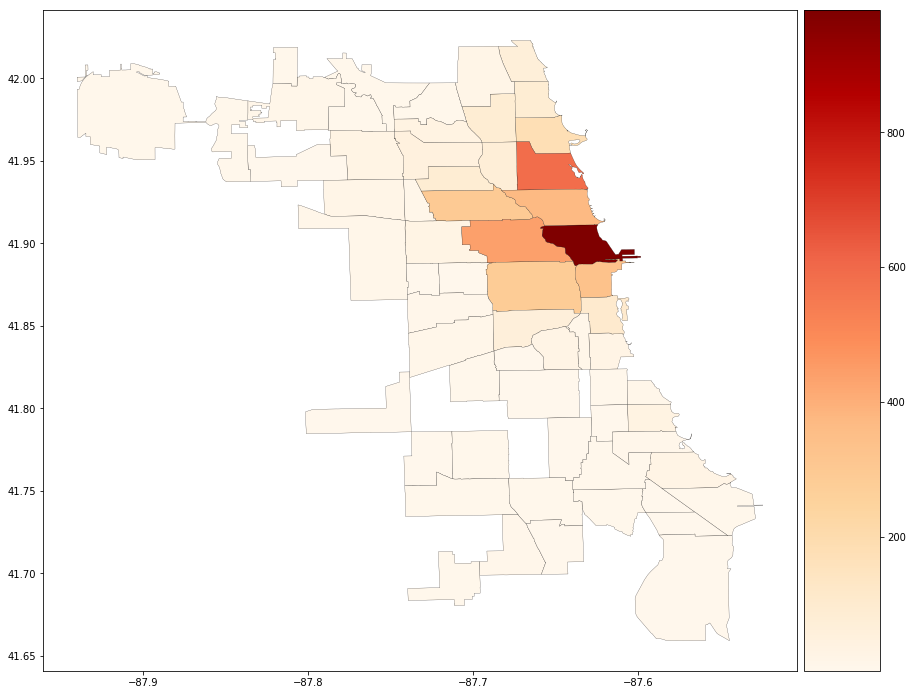

In [28]:
fig, ax = plt.subplots(1,1,figsize=(15,15))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="10%", pad = 0.1)
base = chicago_map.plot(column='drop_offs', ax=ax, legend=True, cax=cax, cmap='OrRd', edgecolor='black', linewidth=0.2)


# Pickup Activity

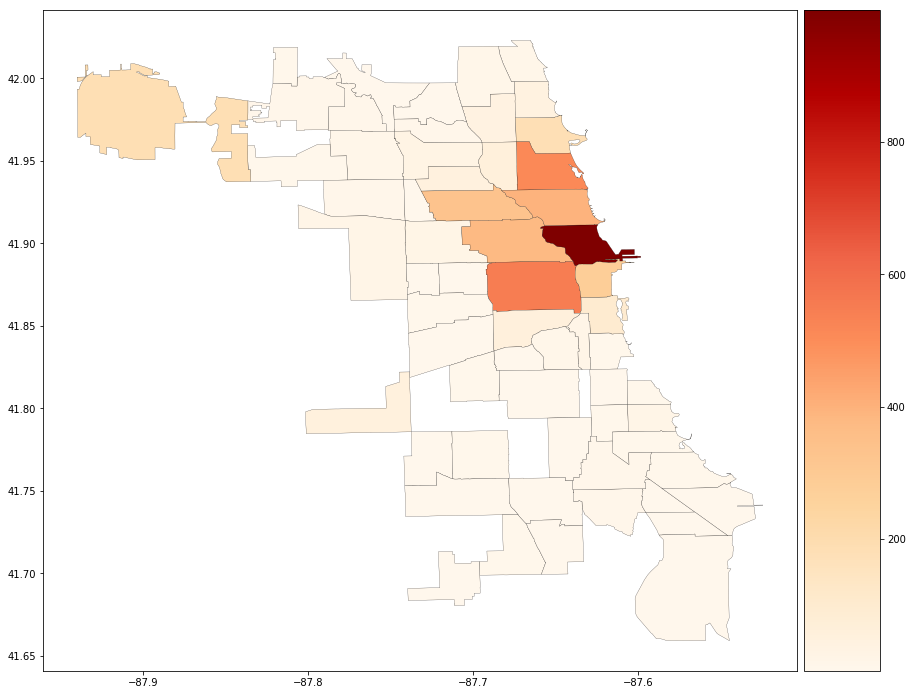

In [29]:
fig, ax = plt.subplots(1,1,figsize=(15,15))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="10%", pad = 0.1)
another = chicago_map.plot(column='pick_ups', ax=ax, legend=True, cax=cax, cmap='OrRd', edgecolor='black', linewidth=0.2)

# Layered visualization of drop offs in community geometry

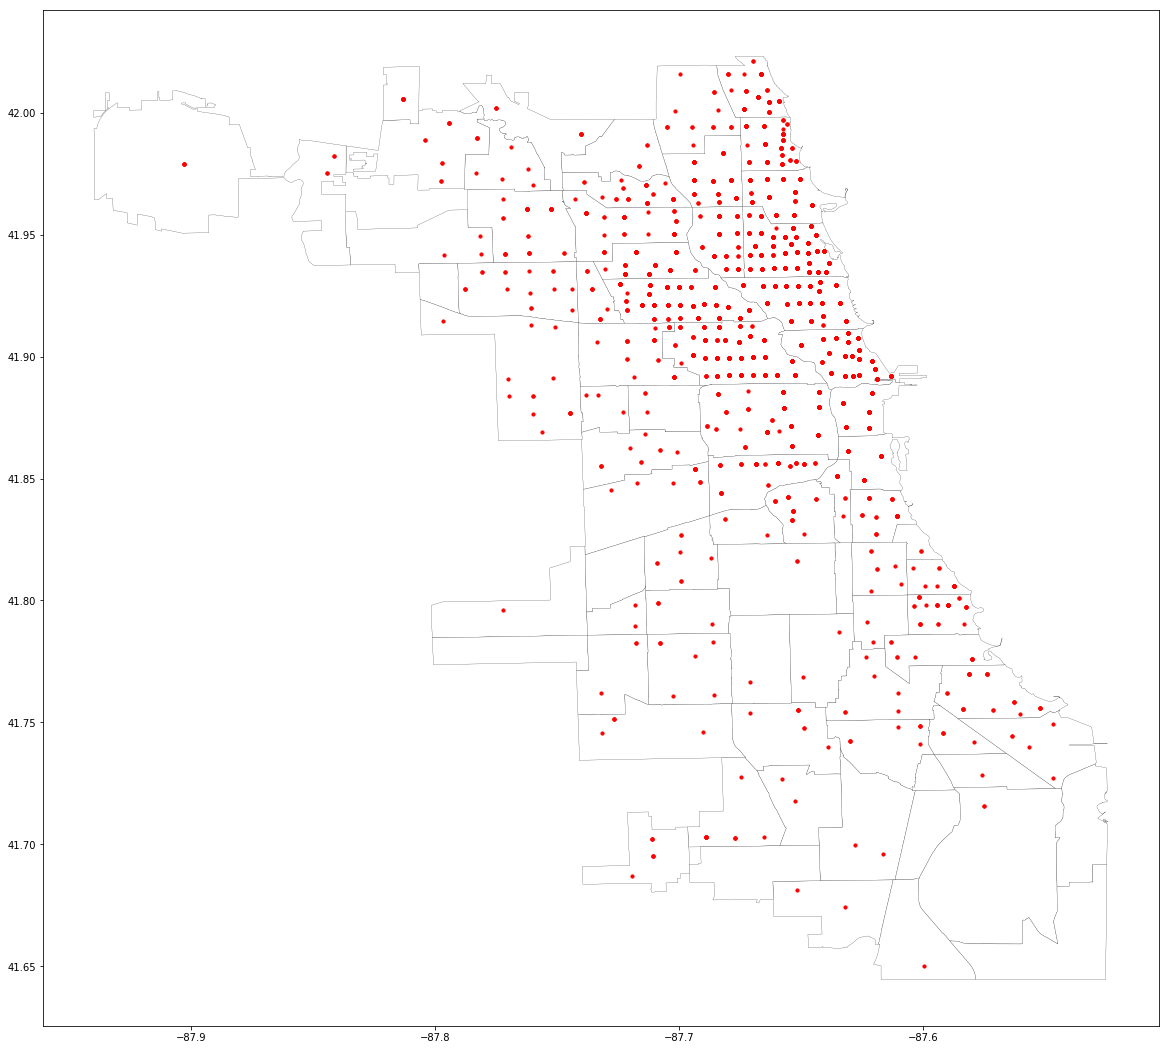

In [21]:
base2 = chicago_map.plot(figsize = (20,20), edgecolor='black', linewidth=0.2, color='white')
drop_offs.plot(ax=base2, marker='o', color='red', markersize=10, figsize=(20,20))

# And pick ups

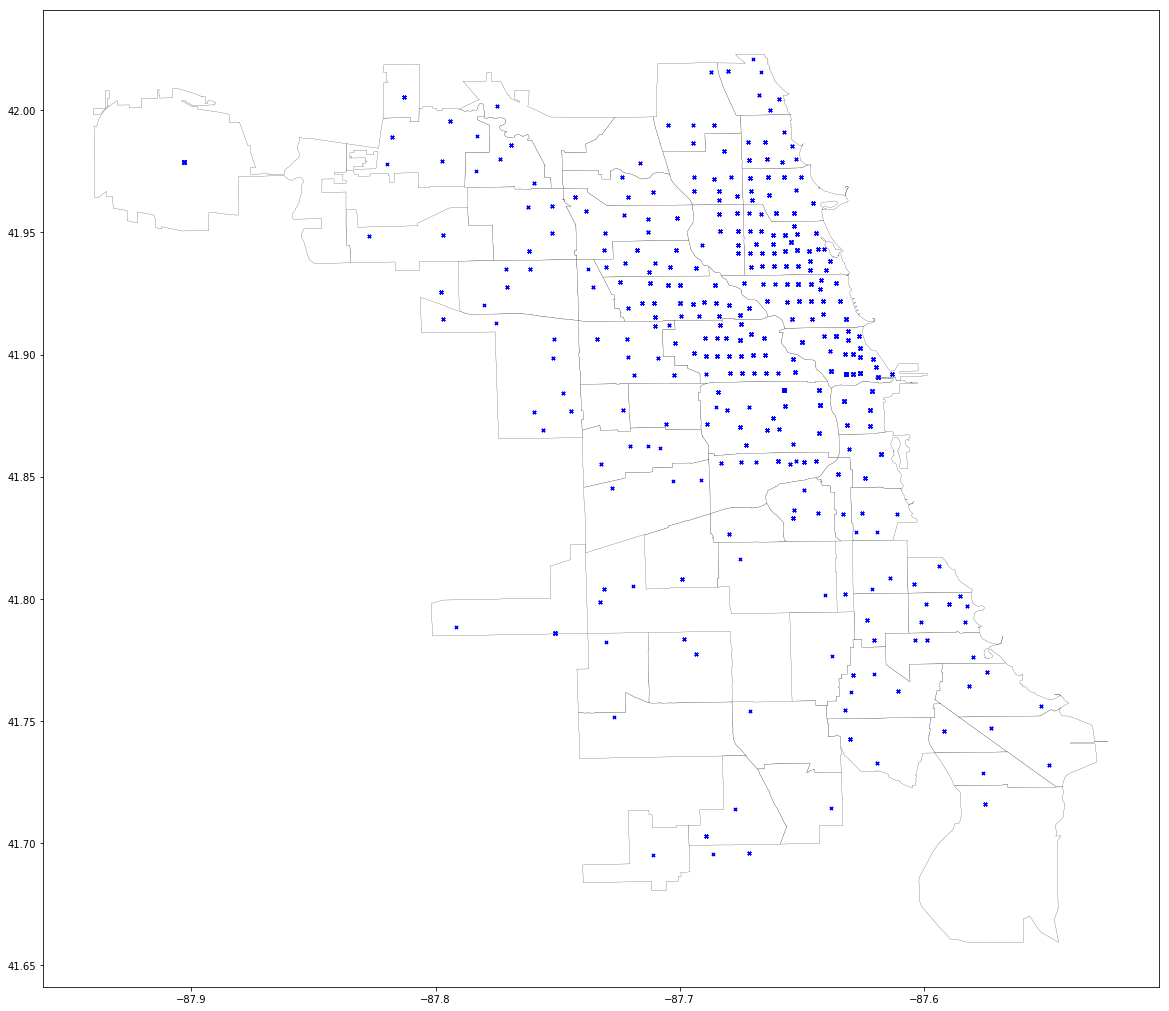

In [30]:
base2 = chicago_map.plot(figsize = (20,20), edgecolor='black', linewidth=0.2, color='white')
pick_ups.plot(ax=base2, marker='x', color='blue', markersize=10, figsize=(20,20))